# Kaggle ML and Data Science Survey

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


## Importing all available data to pandas dataframe

In [4]:
mcq_data = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)
conv_rates_data = pd.read_csv('conversionRates.csv',encoding='ISO-8859-1')
freeform_data = pd.read_csv('freeformResponses.csv',encoding='ISO-8859-1',low_memory=False)

In [5]:
mcq_data.head()
# conv_rates_data.head()
# freeform_data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mcq_data.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
# Basic Analysis and Data cleaning 

total_responses = mcq_data.shape[0]
print("Total number of survey responses : ", total_responses)

total_country = mcq_data['Country'].nunique()
print("Total number of countries participated : ", total_country)

Total number of survey responses :  16716
Total number of countries participated :  52


## Most enthusiast data scientists Home Country

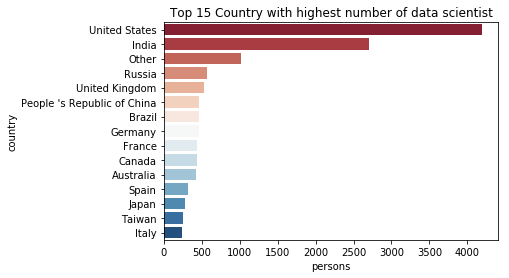

In [8]:
# Top 15 country with highest number of data scientist.
data = mcq_data['Country'].value_counts()[:15].to_frame()
plt.title("Top 15 Country with highest number of data scientist")
sns.barplot(y=data.index, x=data.Country, palette="RdBu")
plt.xlabel("persons")
plt.ylabel("country")
plt.figure(figsize=(15,15))
plt.show()

## Profession of most of the data scientist

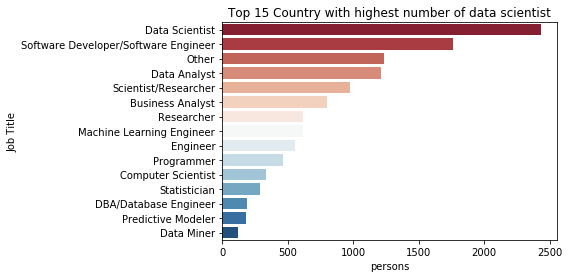

In [9]:
data = mcq_data['CurrentJobTitleSelect'].value_counts()[:15].to_frame()
plt.title("Top 15 Country with highest number of data scientist")
sns.barplot(y=data.index, x=data.CurrentJobTitleSelect, palette="RdBu")
plt.xlabel("persons")
plt.ylabel("Job Title")
plt.figure(figsize=(15,8))
plt.show()

# # Compensation of data scientist 

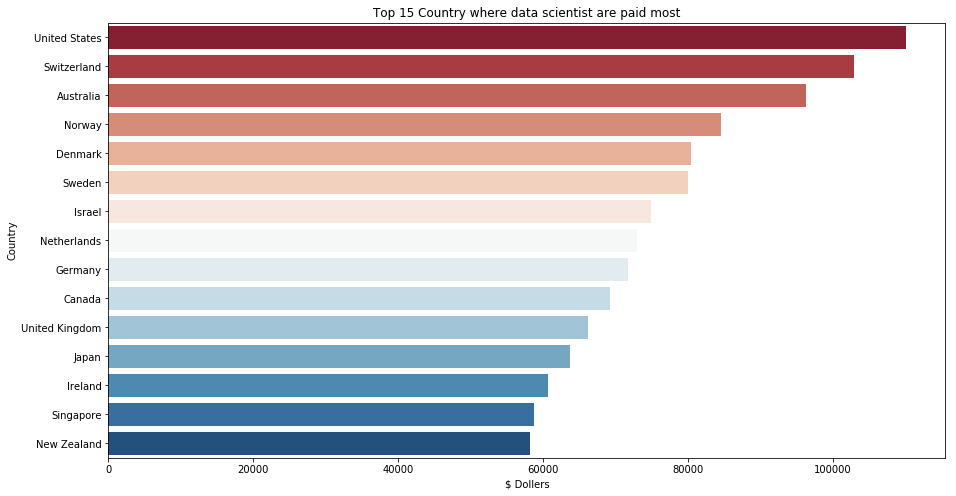

In [10]:
# Country wise compensation
salary = mcq_data[['Country','CompensationAmount','CompensationCurrency','EmploymentStatus','MajorSelect']].dropna()
# sal_countrywise = 
salary = salary[salary['CompensationAmount'] != '-']
salary = salary[salary['CompensationAmount'] != '-99']
CompensationAmount = salary['CompensationAmount'].str.replace(',','').apply(pd.to_numeric)
salary.drop('CompensationAmount', axis=1)
salary['CompensationAmount'] = CompensationAmount

salary = salary.merge(conv_rates_data, left_on = 'CompensationCurrency', right_on = 'originCountry', how = 'left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']

top15_country = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()

plt.figure(figsize=(15,8))
plt.title("Top 15 Country where data scientist are paid most")
sns.barplot(y=top15_country.index, x=top15_country.Salary, palette="RdBu")
plt.xlabel("$ Dollers")
plt.ylabel("Country")
plt.figure(figsize=(15,8))
plt.show()

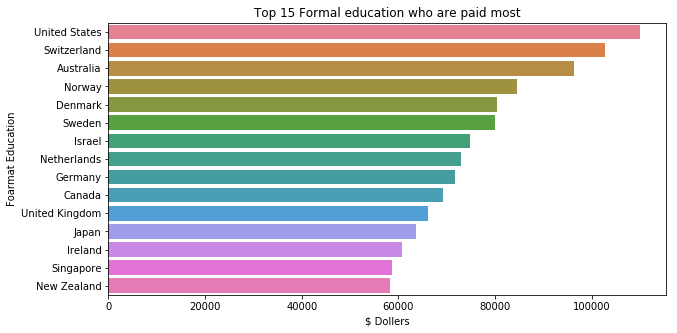

In [11]:
top15_Major = salary.groupby('MajorSelect')['Salary'].median().sort_values(ascending=False)[:15].to_frame()

plt.subplots(figsize=(10,5))
plt.title("Top 15 Formal education who are paid most")
sns.barplot(y=top15_country.index, x=top15_country.Salary, palette="husl")
plt.xlabel("$ Dollers")
plt.ylabel("Foarmat Education")
plt.figure(figsize=(15,8))
plt.show()

## Employment status

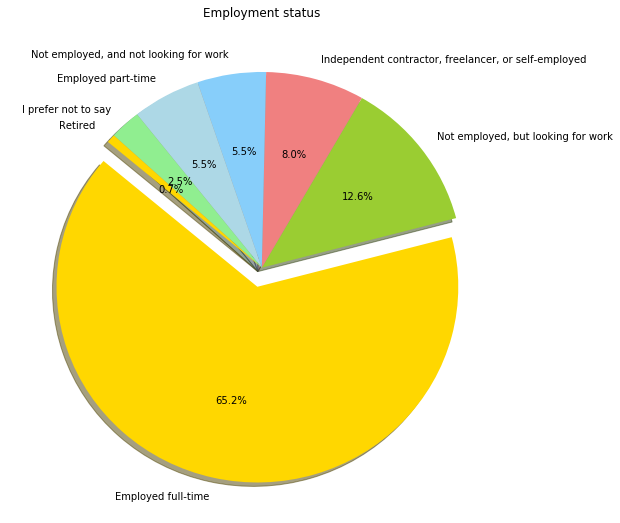

In [12]:
plt.subplots(figsize=(9,9))
emp_status = mcq_data['EmploymentStatus'].value_counts().to_frame()
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightblue', 'lightgreen']
explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.title("Employment status")
plt.pie(emp_status['EmploymentStatus'], labels=emp_status.index, colors=color,shadow=True, startangle=140, explode=explode, autopct='%1.1f%%',)
plt.show()

## Age range in which most data scientist fall into:

In [13]:
mcq_data['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

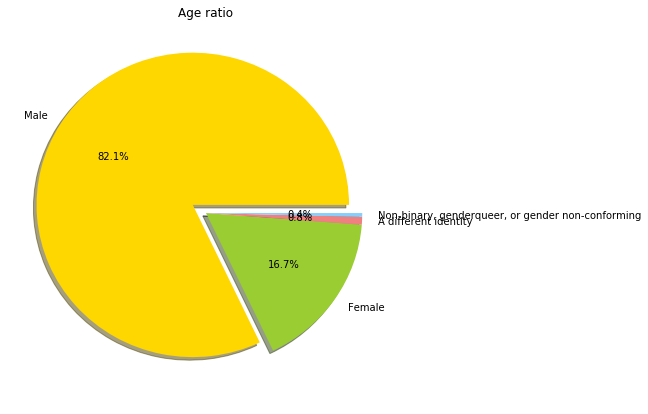

In [14]:
# Above we can see that the minimum age of a datascientist is 0 yrs and highest age is 100 yrs. These both can
# not be possible, so we will remove these false values first then will continue :

# age_data['GenderSelect'].value_counts()
age_data = mcq_data[mcq_data['Age'] >=10]
age_data = age_data[age_data['Age'] <= 65]
age_data['GenderSelect'].value_counts()

age = age_data['GenderSelect'].value_counts().to_frame()
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)
plt.subplots(figsize=(7,7))
plt.title("Age ratio")
plt.pie(age['GenderSelect'], labels=age.index, colors=color,shadow=True, explode=explode, autopct='%1.1f%%')
plt.show()

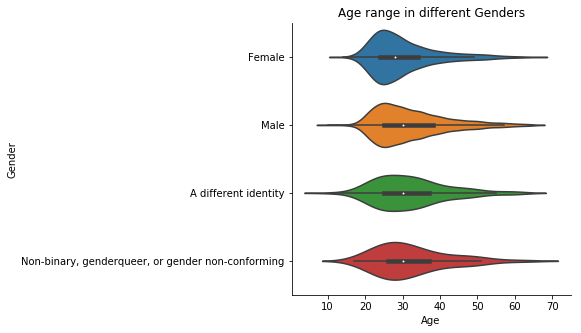

In [15]:
plt.subplots(figsize=(5,5))
plt.title("Age range in different Genders")
sns.violinplot(age_data['Age'], age_data['GenderSelect']) #Variable Plot
sns.despine()
plt.ylabel("Gender")
plt.show()

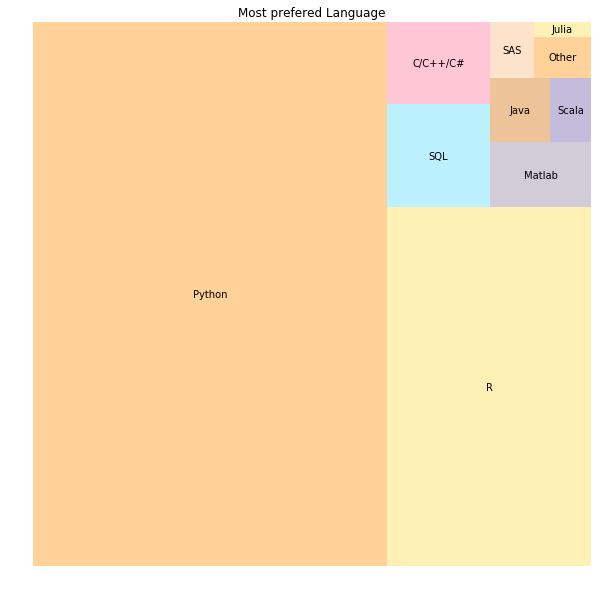

In [16]:
plt.subplots(figsize=(10,10))
prefer_lang = mcq_data['LanguageRecommendationSelect'].value_counts()[:10].to_frame()
color = ['#FE9000', '#FFDD4A', '#5ADBFF', '#FF729F', '#907F9F', '#D76A03','#6B5CA5' , '#FCB97D']
squarify.plot(sizes = prefer_lang.LanguageRecommendationSelect, label = prefer_lang.index,color=color, alpha=.4 )
plt.axis('off')
plt.title("Most prefered Language")
plt.show()


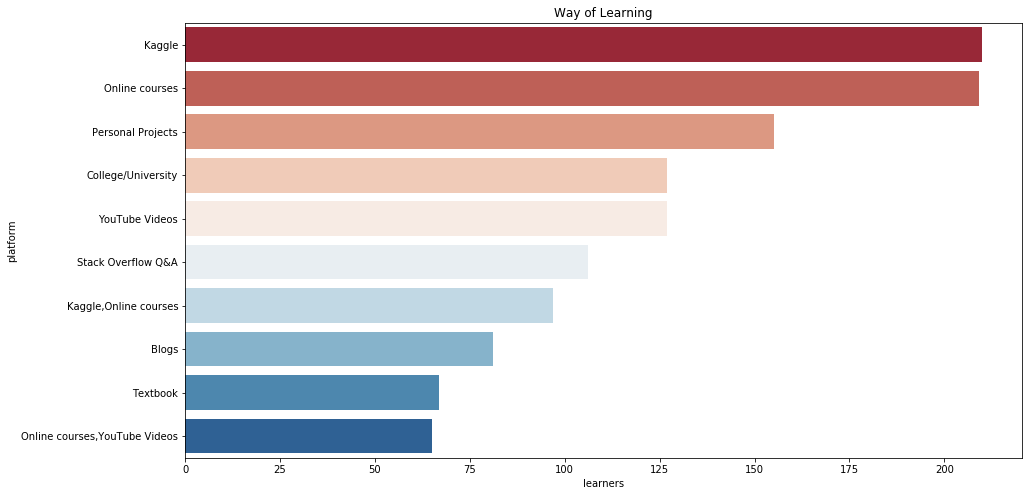

In [17]:
lp = mcq_data['LearningPlatformSelect'].value_counts()[:10].to_frame()

plt.figure(figsize=(15,8))
plt.title("Way of Learning")
sns.barplot(y=lp.index, x=lp.LearningPlatformSelect, palette="RdBu")
plt.xlabel("learners")
plt.ylabel("platform")
plt.figure(figsize=(10,6))
plt.show()

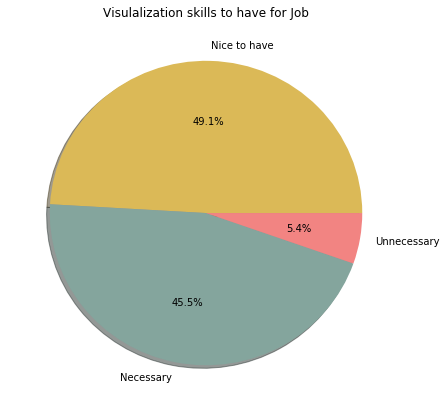

In [18]:
plt.subplots(figsize=(7,7))
jobskillVisual =  mcq_data['JobSkillImportanceVisualizations'].value_counts().to_frame()
colors = ['#DBB957', '#84A59D', '#F28482', '#009FB7']
plt.pie(jobskillVisual['JobSkillImportanceVisualizations'], labels = jobskillVisual.index,shadow=True, colors= colors, autopct='%1.1f%%')
plt.title("Visulalization skills to have for Job")
plt.show()

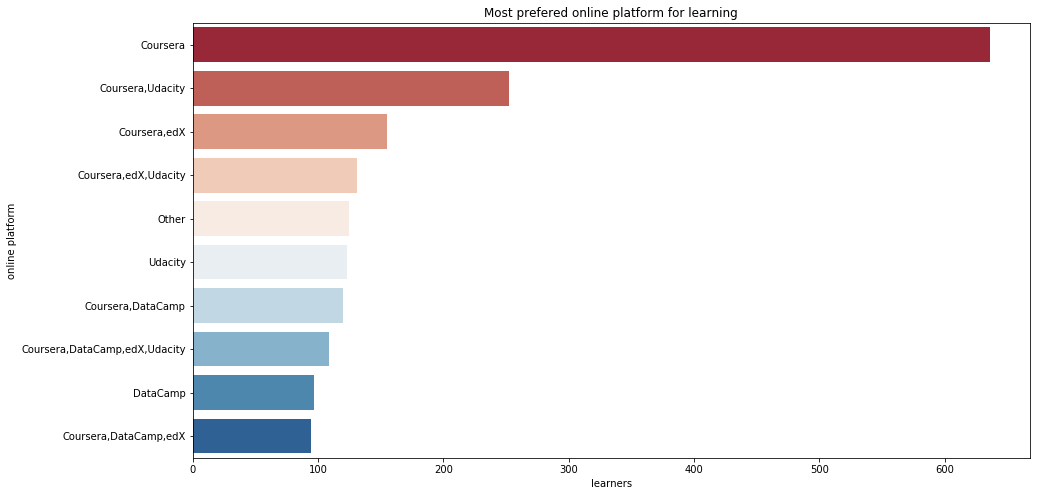

In [19]:
cp = mcq_data['CoursePlatformSelect'].value_counts()[:10].to_frame()

plt.figure(figsize=(15,8))
plt.title("Most prefered online platform for learning")
sns.barplot(y=cp.index, x=cp.CoursePlatformSelect, palette="RdBu")
plt.xlabel("learners")
plt.ylabel("online platform")
plt.figure(figsize=(10,6))
plt.show()

## Challenges for data scientist

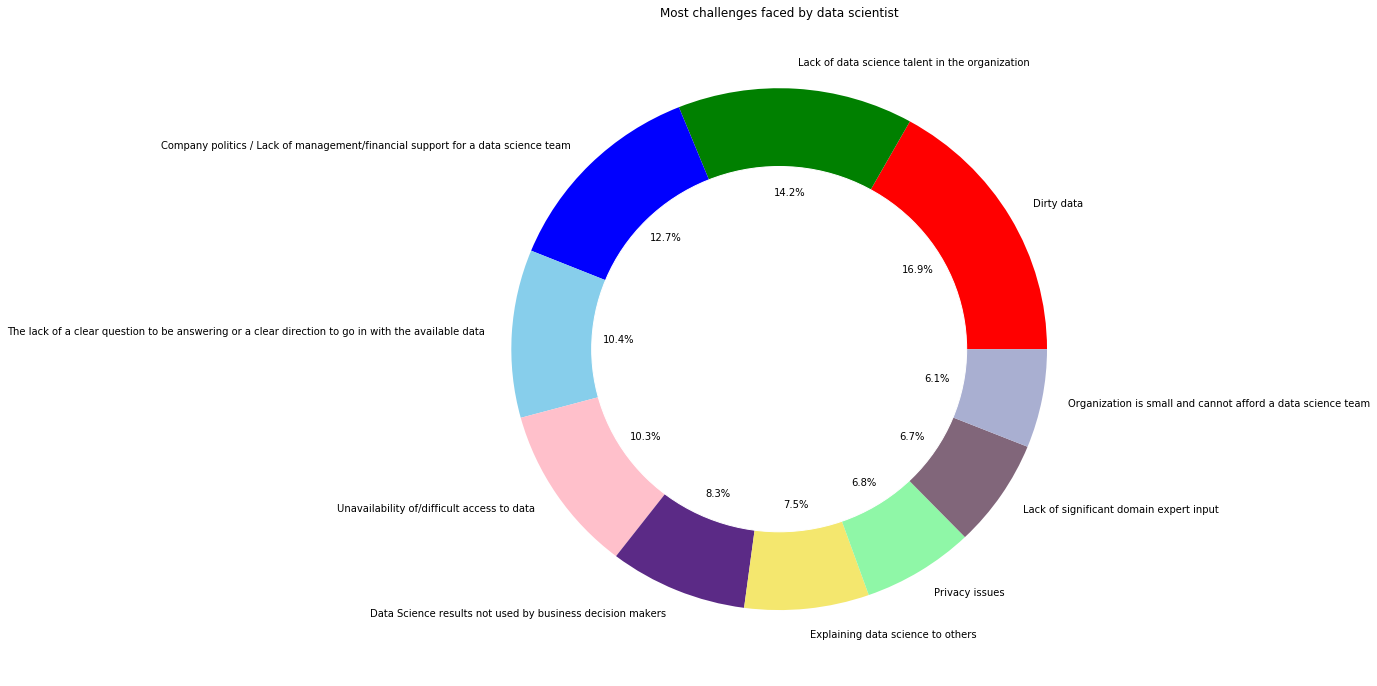

In [32]:
ch = mcq_data['WorkChallengesSelect'].str.split(',').dropna()
challenge = []
for c in ch:
    for d in c:
        challenge.append(d)
df = pd.DataFrame(challenge)
df.columns = ['challenge']
challenge = df['challenge'].value_counts()[:10].to_frame()

# Create a circle for the center of the plot
plt.figure(figsize=(12,12))
plt.title("Most challenges faced by data scientist")
my_circle=plt.Circle( (0,0), 0.7, color='white')
colors = ['red','green','blue','skyblue', 'pink', '#5B2A86','#F4E76E', '#8FF7A7', '#81667A', '#A9AFD1']
plt.pie(challenge['challenge'], labels=challenge.index, colors=colors, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()